In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os 
import sys

In [21]:
from constant import MIN_SESSION, MAX_SESSION

In [22]:
TOPIC_TAG = 'topic_data_%s.pkl'
sessions = list(range(MIN_SESSION, MAX_SESSION+1))

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sys.path.append("/home/rocassius/w266_final/scripts/assembly")
sys.path.append("/home/rocassius/w266_final/scripts/modeling")

In [133]:
from document import *
from helper import *
from rmn import *
from rmn_analyzer import *

In [5]:
# load embedding tools
generic_tools_path = "/home/rocassius/gen-data/tools/generic_tools"
prayer_tools_path = "/home/rocassius/gen-data/tools/prayer_tools"

global_embedding_matrix = load_pickled_object(os.path.join(prayer_tools_path, "embedding_matrix_wg"))
global_tokenizer_dict = load_pickled_object(os.path.join(prayer_tools_path, "tokenizer_dict_wg"))

In [9]:
# load rmn
local_models_path = "/home/rocassius/gen-data/models"
rmn = RigidRMN()
rmn.load_rmn("PoliteFinish", local_models_path)
rmn.infer_embedding_matrix = global_embedding_matrix
rmn.infer_tokenizer_dict = global_tokenizer_dict

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [36]:
# load data
topic_data_path = "/home/rocassius/gen-data/data/topic-data-first/" 
data = load_pickled_object(os.path.join(topic_data_path, "topic_data_all.pkl"))

In [39]:
data[0].keys()

dict_keys(['dataset', 'topics', 'session'])

In [40]:
data[0]['dataset'].keys()

dict_keys(['n_records', 'n_records_R', 'n_records_D', 'n_nan_preds_R', 'n_nan_preds_D', 'hh', 'hh_R', 'hh_D', 'js_RD', 'js_placebo', 'topic_use', 'topic_use_R', 'topic_use_D'])

Records Data

In [97]:
total_records = np.array([d['dataset']['n_records'] for d in data]).sum()
total_records

3913325

In [99]:
R_records = np.array([d['dataset']['n_records_R'] for d in data]).sum()
R_records

1697124

In [101]:
D_records = np.array([d['dataset']['n_records_D'] for d in data]).sum()
D_records

2175473

In [ ]:
D_records = np.array(dp[])

In [88]:
sessions = np.array([d['session'] for d in data])

In [41]:
js = [d['dataset']['js_RD'] for d in data]

In [48]:
js_placebo = [d['dataset']['js_placebo']['mean'] for d in data] 

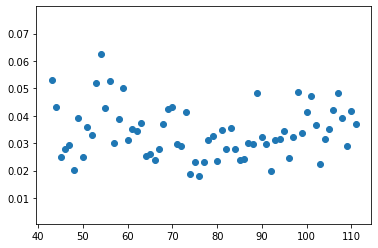

In [109]:
plt.scatter(sessions, js)
plt.show()

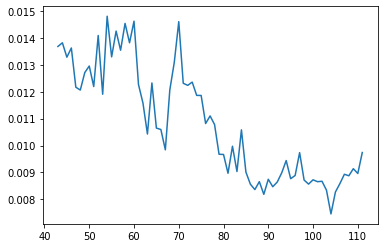

In [55]:
plt.plot(sessions, js_placebo)
plt.show()

In [51]:
js_diff = np.array(js) - np.array(js_placebo)

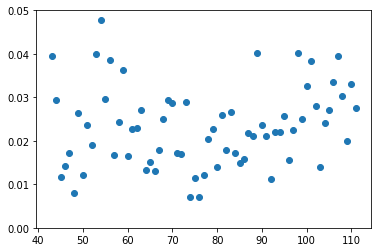

In [110]:
# success in detecting overall divergence !
plt.scatter(sessions, js_diff)
plt.ylim((0.000, 0.05))
plt.show()

In [80]:
n_rec_99 = np.array([d['topics'][99]['n_records'] for d in data])

In [81]:
n_rec_99

array([   1,    0,    0,    1,    1,    1,    4,    2,    1,    0,    1,
          6,    1,    2,    1,    0,    2,    0,    0,    3,   10,   11,
          6,   22,   11,   12,   14,    6,   40,   14,   24,   42,   37,
         51,   16,   56,  100,  106,  161,   73,  200,  264,  237,  549,
        617,  691, 1177, 1199, 1573, 1913, 1866, 1894, 1864, 1701, 1308,
       1806, 1753, 3086, 2976, 3241, 3331, 5520, 3539, 5829, 3937, 5742,
       3207, 4445, 5693])

In [87]:
np.argwhere(n_rec_99 == 100)

array([[36]])

In [85]:
js_health = (np.array([d['topics'][99]['js_RD'] for d in data]) -
             np.array([d['topics'][99]['js_placebo']['mean'] for d in data ]))

In [89]:
js_health[45:]

array([-1.69890431e-02, -1.90112448e-02,  9.92445128e-04,  7.67736112e-03,
        7.08621869e-05, -1.91675129e-03,  4.21127821e-02,  1.34485764e-02,
       -4.03679076e-03,  2.52035974e-03,  2.81325417e-02,  1.39424644e-02,
        1.31427201e-02,  1.60953511e-02,  2.22428621e-02,  1.84344367e-02,
        1.44303363e-02,  1.59372697e-03,  1.28031104e-02,  5.04106025e-03,
       -1.54751434e-03,  2.05485656e-02,  2.09323676e-02,  7.64715456e-03,
        1.78277577e-02,  1.32498904e-02,  2.44564015e-02,  8.20597371e-03,
        5.45094219e-03,  2.82749409e-02,  1.48103847e-02,  9.59579333e-03,
        3.98637092e-02])

In [91]:
len(js_health)

69

In [92]:
len(sessions)

69

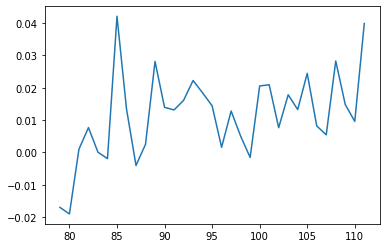

In [165]:
plt.plot(sessions[36:], js_health[36:])
plt.show()

In [136]:
session_index = dict(zip(sessions, range(len(sessions))))

In [147]:
def analyze_session(s, data):
    d = data[session_index[s]]
    
    js = [v['js_RD'] - v['js_placebo']['mean']
          for t, v in d['topics'].items()]
    
    return np.array(js)

In [174]:
data[0]['topics'][0].keys()

dict_keys(['n_records', 'n_records_R', 'n_records_D', 'n_nan_preds_R', 'n_nan_preds_D', 'hh', 'hh_R', 'hh_D', 'js_RD', 'js_placebo', 'topic_use', 'topic_use_R', 'topic_use_D'])

In [149]:
js_111 = analyze_session(111, data)

In [168]:
js_111

array([ 0.00507642,  0.04240782,  0.05873158, -0.07177333,  0.03933496,
        0.02932894,  0.0096653 ,  0.06160078, -0.00080746,  0.        ,
        0.02124584,  0.00748709,  0.00411589,  0.02896776, -0.00520131,
       -0.01184928,  0.019247  ,  0.00924875, -0.00277193,  0.02199024,
        0.01050919,  0.01024745,  0.00693724, -0.03735365,  0.00746904,
        0.03806727,  0.05341905,  0.00156792,  0.02783158,  0.03234679,
        0.01253957,  0.03102679,  0.01721151, -0.00401423,  0.00195476,
        0.02183028,  0.02234976,  0.00043196,  0.01559254,  0.03009399,
        0.00094413,  0.02773243,  0.04147174,  0.01145549,  0.02939366,
        0.00744216,  0.01173974,  0.01512179,  0.01268422,  0.01636257,
        0.03554134,  0.04707123,  0.01018776,  0.00998184,  0.03151142,
        0.03138137,  0.03292645,  0.00713822,  0.02811898,  0.01047482,
        0.        ,  0.03012667,  0.01528451,  0.02223606,  0.00475135,
        0.0103641 , -0.01071687, -0.00591515,  0.00094546,  0.00

In [158]:
hot_topics = np.flip(np.argsort(js_111))

In [169]:
js_111[hot_topics[:10]]

array([0.06160078, 0.05873158, 0.05341905, 0.04814438, 0.04707123,
       0.04240782, 0.04147174, 0.03986371, 0.03933496, 0.03811696])

In [170]:
analyzer.topic_nns[hot_topics[:15]]

array([[['o', '0.684'],
        ['q', '0.667'],
        ['l', '0.66'],
        ['h', '0.657'],
        ['k', '0.647'],
        ['n', '0.627'],
        ['w', '0.62'],
        ['e', '0.603'],
        ['p', '0.599'],
        ['na', '0.587']],

       [['nomination', '0.686'],
        ['votes', '0.664'],
        ['nominees', '0.637'],
        ['nominations', '0.634'],
        ['nominee', '0.625'],
        ['candidates', '0.618'],
        ['nominated', '0.609'],
        ['polls', '0.601'],
        ['vote', '0.601'],
        ['election', '0.592']],

       [['134', '0.878'],
        ['173', '0.876'],
        ['157', '0.873'],
        ['143', '0.87'],
        ['136', '0.87'],
        ['232', '0.869'],
        ['169', '0.869'],
        ['139', '0.868'],
        ['163', '0.867'],
        ['161', '0.865']],

       [['amending', '0.513'],
        ['amendments', '0.504'],
        ['authorizing', '0.495'],
        ['objecting', '0.473'],
        ['approving', '0.469'],
        ['enactment', '0.466

In [164]:
analyzer.topic_nns[[7,4,6,90,70, 16, 0, 36]]

array([[['o', '0.684'],
        ['q', '0.667'],
        ['l', '0.66'],
        ['h', '0.657'],
        ['k', '0.647'],
        ['n', '0.627'],
        ['w', '0.62'],
        ['e', '0.603'],
        ['p', '0.599'],
        ['na', '0.587']],

       [['guys', '0.533'],
        ['ital', '0.515'],
        ["'re", '0.5'],
        ['wondering', '0.487'],
        ['dad', '0.483'],
        ['maybe', '0.482'],
        ['somebody', '0.481'],
        ['kids', '0.476'],
        ['getting', '0.474'],
        ['everybody', '0.47']],

       [['slap', '0.445'],
        ['give', '0.441'],
        ['get', '0.414'],
        ['lose', '0.413'],
        ['cut', '0.412'],
        ['try', '0.405'],
        ['grab', '0.402'],
        ['got', '0.396'],
        ['osgood', '0.394'],
        ['snap', '0.394']],

       [['door', '0.64'],
        ['upstairs', '0.606'],
        ['bed', '0.605'],
        ['inside', '0.591'],
        ['room', '0.589'],
        ['window', '0.583'],
        ['closet', '0.581'],
       

In [155]:
data[session_index[111]]['topics'][7]

{'n_records': 142,
 'n_records_R': 77,
 'n_records_D': 65,
 'n_nan_preds_R': 0,
 'n_nan_preds_D': 0,
 'hh': 0.27200016,
 'hh_R': 0.21837552,
 'hh_D': 0.34693632,
 'js_RD': 0.12270070382035284,
 'js_placebo': {'mean': 0.061099920874396696,
  'lower': 0.05591437027279238,
  'upper': 0.06628547147600101},
 'topic_use': [(7, 0.5092393159866333),
  (4, 0.05623307079076767),
  (6, 0.05310580134391785),
  (90, 0.03827812150120735),
  (70, 0.031031956896185875),
  (16, 0.028565548360347748),
  (0, 0.026814889162778854),
  (36, 0.02578550949692726),
  (87, 0.020151568576693535),
  (19, 0.016624877229332924),
  (21, 0.014648061245679855),
  (53, 0.013328121043741703),
  (17, 0.011711157858371735),
  (63, 0.010465249419212341),
  (49, 0.009942498058080673),
  (78, 0.009332406334578991),
  (81, 0.00877384003251791),
  (43, 0.008559748530387878),
  (11, 0.008046663366258144),
  (83, 0.007502386346459389),
  (8, 0.007098901551216841),
  (66, 0.005922737531363964),
  (42, 0.005152096971869469),
  (24

(array([ 1.,  0.,  1.,  1.,  4., 27., 31., 22., 10.,  3.]),
 array([-0.07177333, -0.05843592, -0.04509851, -0.0317611 , -0.01842368,
        -0.00508627,  0.00825114,  0.02158855,  0.03492596,  0.04826337,
         0.06160078]),
 <a list of 10 Patch objects>)

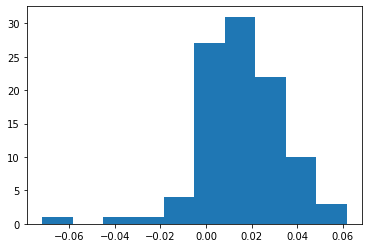

In [150]:
plt.hist(js_111)

# Playing with the model itself

In [112]:
# load embedding tools
prayer_tools_path = "/home/rocassius/gen-data/tools/prayer_tools"
generic_tools_path = "/home/rocassius/gen-data/tools/generic_tools"

global_embedding_matrix = load_pickled_object(os.path.join(prayer_tools_path, "embedding_matrix_wg"))
global_tokenizer_dict = load_pickled_object(os.path.join(prayer_tools_path, "tokenizer_dict_wg"))

In [124]:
RMN_NAME = "PoliteFinish"
RMN_PATH = "/home/rocassius/gen-data/models"

rmn = RigidRMN()
rmn.load_rmn(name=RMN_NAME, save_path=RMN_PATH)
rmn.infer_embedding_matrix = global_embedding_matrix
rmn.infer_tokenizer_dict = global_tokenizer_dict

In [121]:
from constant import DOC_GEN_PATH, DOCUMENT

docs_df = load_pickled_object(os.path.join("/home/rocassius/gen-data/doc/doc-generic/", DOCUMENT % 'sample'))

In [125]:
analyzer = RMN_Analyzer(rmn, docs_df)

In [126]:
analyzer.predict_topics()

In [127]:
analyzer.find_topic_nns()


Topic 0
['applause', 'smile', 'loud', 'cheers', 'laugh', 'shouted', 'shouting', 'joking', 'waved', 'shout']

Topic 1
['improving', 'opportunities', 'integrating', 'improve', 'innovation', 'objectives', 'ensuring', 'goals', 'strategies', 'innovative']

Topic 2
['nomination', 'votes', 'nominees', 'nominations', 'nominee', 'candidates', 'nominated', 'polls', 'vote', 'election']

Topic 3
['examples', 'merely', 'describe', 'instances', 'example', 'abbāsābād', 'mentioned', 'instance', 'simple', 'penchant']

Topic 4
['guys', 'ital', "'re", 'wondering', 'dad', 'maybe', 'somebody', 'kids', 'getting', 'everybody']

Topic 5
['nicaragua', 'salvador', 'fidel', 'castro', 'dictatorship', 'junta', 'marxist', 'leftist', 'nicaraguan', 'regime']

Topic 6
['slap', 'give', 'get', 'lose', 'cut', 'try', 'grab', 'got', 'osgood', 'snap']

Topic 7
['o', 'q', 'l', 'h', 'k', 'n', 'w', 'e', 'p', 'na']

Topic 8
['commenting', 'listens', 'elaborating', 'interviewer', 'candidly', 'talk', 'specifics', 'news', 'listen


Topic 58
['disarmament', 'pyongyang', 'nuclear', 'proliferation', 'nonproliferation', 'progress', 'normalization', 'verifiable', 'diplomatic', 'normalizing']

Topic 59
['arable', 'tracts', 'lands', 'farmland', 'plantations', 'irrigated', 'reclaimed', 'encompassed', 'extensive', 'undeveloped']

Topic 60
['doubtful', 'jehovah', 'abbot', 'regard', 'heretics', 'hades', 'heracles', 'authorship', 'bishopric', 'unwilling']

Topic 61
['inflation', 'unemployment', 'slowdown', 'recession', 'decline', 'growth', 'rate', 'rise', 'slowing', 'gdp']

Topic 62
['river', 'reservoir', 'creek', 'lake', 'dam', 'basin', 'rivers', 'tributaries', 'drains', 'drainage']

Topic 63
['install', 'restaurant', 'rent', 'diners', 'restaurants', 'shop', 'starbucks', 'renting', 'installing', 'buy']

Topic 64
['injunction', 'patent', 'lawsuit', 'plaintiff', 'rulings', 'filed', 'lawsuits', 'supreme', 'appellate', 'court']

Topic 65
['research', 'institute', 'science', 'study', 'analysis', 'environmental', 'directorate', 

In [128]:
analyzer.find_topic_coherence()

In [129]:
analyzer.topic_coherence

24    0.975000
26    0.941406
53    0.831250
52    0.830469
98    0.828125
        ...   
8     0.387500
14    0.373828
37    0.351562
79    0.325391
60    0.216797
Length: 100, dtype: float64

In [130]:
# most coherent topics
analyzer.topic_nns[analyzer.topic_coherence.index[:4]]

array([[['1899', '0.863'],
        ['1902', '0.861'],
        ['1903', '0.858'],
        ['1907', '0.856'],
        ['1909', '0.852'],
        ['1888', '0.851'],
        ['1914', '0.851'],
        ['1872', '0.85'],
        ['1883', '0.85'],
        ['1919', '0.85']],

       [['134', '0.878'],
        ['173', '0.876'],
        ['157', '0.873'],
        ['143', '0.87'],
        ['136', '0.87'],
        ['232', '0.869'],
        ['169', '0.869'],
        ['139', '0.868'],
        ['163', '0.867'],
        ['161', '0.865']],

       [['pretty', '0.454'],
        ['thing', '0.446'],
        ["'m", '0.435'],
        ['maybe', '0.434'],
        ["'re", '0.433'],
        ['seems', '0.43'],
        ['anyway', '0.423'],
        ['happen', '0.419'],
        ['happens', '0.415'],
        ['happening', '0.411']],

       [['infantry', '0.827'],
        ['battalion', '0.824'],
        ['corps', '0.803'],
        ['cavalry', '0.793'],
        ['brigade', '0.781'],
        ['platoon', '0.775'],
     

In [131]:
analyzer.topic_nns[analyzer.topic_coherence.index[48:52]]

array([[['disarmament', '0.622'],
        ['pyongyang', '0.568'],
        ['nuclear', '0.56'],
        ['proliferation', '0.53'],
        ['nonproliferation', '0.528'],
        ['progress', '0.513'],
        ['normalization', '0.495'],
        ['verifiable', '0.494'],
        ['diplomatic', '0.492'],
        ['normalizing', '0.486']],

       [['examples', '0.464'],
        ['merely', '0.45'],
        ['describe', '0.402'],
        ['instances', '0.396'],
        ['example', '0.391'],
        ['abbāsābād', '0.391'],
        ['mentioned', '0.39'],
        ['instance', '0.383'],
        ['simple', '0.38'],
        ['penchant', '0.379']],

       [['trafficking', '0.788'],
        ['crime', '0.733'],
        ['prostitution', '0.719'],
        ['offenses', '0.713'],
        ['narcotics', '0.695'],
        ['pornography', '0.69'],
        ['smuggling', '0.675'],
        ['gang', '0.672'],
        ['robbery', '0.668'],
        ['illegal', '0.666']],

       [['older', '0.548'],
        ['age

In [132]:
analyzer.topic_nns[analyzer.topic_coherence.index[96:100]]

array([[['adhering', '0.413'],
        ['dictating', '0.412'],
        ['strictly', '0.409'],
        ['dismantling', '0.403'],
        ['altering', '0.397'],
        ['dispose', '0.394'],
        ['undesirable', '0.39'],
        ['prohibited', '0.387'],
        ['inimical', '0.387'],
        ['immoral', '0.387']],

       [['amass', '0.44'],
        ['borrow', '0.425'],
        ['devolve', '0.422'],
        ['enormous', '0.422'],
        ['attract', '0.421'],
        ['considerable', '0.409'],
        ['wealth', '0.402'],
        ['bequeath', '0.4'],
        ['speculators', '0.4'],
        ['fetch', '0.395']],

       [['wholeheartedly', '0.418'],
        ['specifically', '0.41'],
        ['answer', '0.399'],
        ['assume', '0.393'],
        ['begs', '0.38'],
        ['admit', '0.38'],
        ['simply', '0.378'],
        ['refuse', '0.373'],
        ['responsibility', '0.372'],
        ['obligation', '0.37']],

       [['doubtful', '0.426'],
        ['jehovah', '0.424'],
        